# ----------------------KPMG VIRTUAL INTERNSHIP PROJECT----------------------------

## TASK: 1 - Data Quality Assessment
Assessment of data quality and completeness in preparation for analysis.

### The client provided KPMG with 3 datasets:

1.Customer Demographic

2.Customer Addresses

3.Transactions data in the past 3 months

# Importing libaries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from datetime import datetime

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

# Importing Data 

In [2]:
# import excel file
data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final (1).xlsx")

# importing each file seperately
ts = pd.read_excel(data, 'Transactions')
nc = pd.read_excel(data, 'NewCustomerList',skiprows=1)
cd = pd.read_excel(data, 'CustomerDemographic',skiprows=1)
ca = pd.read_excel(data, 'CustomerAddress',skiprows=1)

C:\Users\Dubey\AppData\Local\Temp\ipykernel_10324\1521415810.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  nc = pd.read_excel(data, 'NewCustomerList',skiprows=1)
C:\Users\Dubey\AppData\Local\Temp\ipykernel_10324\1521415810.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cd = pd.read_excel(data, 'CustomerDemographic',skiprows=1)


# Expeloring Datasets

### Transaction 

In [3]:
# top rows of dataset
ts.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5.0,78.0,787.0,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# rows and colunms od dataset
ts.shape

(20000, 13)

In [5]:
# data type od columns
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  float64       
 1   product_id               20000 non-null  float64       
 2   customer_id              20000 non-null  float64       
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
# statistical summmary od dataset
ts.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


as we can see that online order should be object data type but its in float data type so we should change it.

In [7]:
# converting the online  order type
ts['online_order'] = ts['online_order'].astype(object)

In [8]:
# checking nulll values
ts.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

As we can seeethere are null values in some columns they can be treated accouding to ther nature or can be dropped.

In [9]:
# check duplicate
ts.duplicated().sum()

0

In [10]:
# check unique values
ts.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [11]:
# value counts in the object type data
def print_value_counts(df):
  for col in ts:
    if df[col].dtype == 'object':
      print(f'Column {col}:')
      print(ts[col].value_counts(), end='\n\n')
print_value_counts(ts)

Column online_order:
1.0    9829
0.0    9811
Name: online_order, dtype: int64

Column order_status:
Approved     19821
Cancelled      179
Name: order_status, dtype: int64

Column brand:
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

Column product_line:
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

Column product_class:
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

Column product_size:
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64



In [12]:
# cheaking column
ts['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [13]:
#convert date column from integer to datetime
ts['product_first_sold_date'] = pd.to_datetime(ts['product_first_sold_date'], unit='s')
ts['product_first_sold_date']

0       1970-01-01 11:27:25
1       1970-01-01 11:35:01
2       1970-01-01 10:06:01
3       1970-01-01 10:02:25
4       1970-01-01 11:43:46
                ...        
19995   1970-01-01 10:30:23
19996   1970-01-01 09:52:40
19997   1970-01-01 11:13:30
19998   1970-01-01 10:36:56
19999   1970-01-01 10:05:34
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

product_first_sold_date values are not right as it shows everything happening the same day at different times 

### New Customer List

In [14]:
# top rows 
nc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,0.41,0.5125,0.640625,0.544531,1,1.0,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,0.59,0.5900,0.737500,0.626875,1,1.0,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,0.74,0.7400,0.740000,0.740000,1,1.0,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.53,0.6625,0.662500,0.662500,4,4.0,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.71,0.7100,0.887500,0.887500,4,4.0,1.703125


there are some unnnamed columns which should be droped toget clean dataset.

In [15]:
#Dropping the unnamed columns
nc.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [16]:
# shape
nc.shape

(1000, 18)

In [17]:
# datatype
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [18]:
# stastical summmary of dataset
nc.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [19]:
# check null values
nc.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [20]:
# check duplicate
nc.duplicated().sum()

0

In [21]:
# check unique values
nc.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

In [22]:
# value counts in the object type data
def print_value_counts(df):
  for col in nc:
    if df[col].dtype == 'object':
      print(f'Column {col}:')
      print(nc[col].value_counts(), end='\n\n')
print_value_counts(nc)

Column first_name:
Rozamond     3
Dorian       3
Mandie       3
Inglebert    2
Ricki        2
            ..
Diego        1
Lucilia      1
Eddy         1
Caron        1
Sylas        1
Name: first_name, Length: 940, dtype: int64

Column last_name:
Sissel       2
Minshall     2
Borsi        2
Shoesmith    2
Sturch       2
            ..
O'Moylane    1
Axtens       1
Moxted       1
Conrad       1
Duffill      1
Name: last_name, Length: 961, dtype: int64

Column gender:
Female    513
Male      470
U          17
Name: gender, dtype: int64

Column job_title:
Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64

Column job_industry_category:
Financial Services    203


### Customer Demographic 

In [23]:
# top rows 
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [24]:
# data shape
cd.shape

(4000, 13)

In [25]:
# datatype of columns
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [26]:
# statistical summary
cd.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [27]:
# null values
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [28]:
# duplicate value
cd.duplicated().sum()

0

In [29]:
#Checking for uniqueness of each column
cd.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [30]:
# value counts in the object type data
def print_value_counts(df):
  for col in df:
    if df[col].dtype == 'object':
      print(f'Column {col}:')
      print(df[col].value_counts(), end='\n\n')
print_value_counts(cd)

Column first_name:
Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64

Column last_name:
Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64

Column gender:
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

Column job_title:
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assist

Default column has different values so droping them is best

In [31]:
cd=cd.drop('default', axis=1)

### CustomerAddress

In [32]:
# top rows
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [33]:
# shape of data set
ca.shape

(3999, 6)

In [34]:
# datatype od dataset
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3999 non-null   float64
 1   address             3999 non-null   object 
 2   postcode            3999 non-null   float64
 3   state               3999 non-null   object 
 4   country             3999 non-null   object 
 5   property_valuation  3999 non-null   float64
dtypes: float64(3), object(3)
memory usage: 187.6+ KB


In [35]:
# statistical  summary of dataset
ca.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [36]:
# check nulls
ca.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [37]:
# check duplicate
ca.duplicated().sum()

0

In [38]:
# check number of unique values
ca.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [39]:
# value counts in the object type data
def print_value_counts(df):
  for col in df:
    if df[col].dtype == 'object':
      print(f'Column {col}:')
      print(df[col].value_counts(), end='\n\n')
print_value_counts(ca)

Column address:
3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

Column state:
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Column country:
Australia    3999
Name: country, dtype: int64



# summary 
### Transaction 
* online order should be object data type but its in float data type so we should change it.
* Athere are null values in some columns they can be treated accouding to ther nature or can be dropped.
* no duplicate values present in the dataset.
* product_first_sold_date values are not right as it shows everything happening the same day at different times

### New Customer List
*  there are null values in some columns they can be treated accouding to ther nature or can be dropped.
*  no duplicate values present in the dataset.
*  there are some unnnamed columns which should be droped toget clean dataset.

### Customer Demographic
*  there are null values in some columns they can be treated accouding to ther nature or can be dropped.
*  no duplicate values present in the dataset.
*  Default column has different values so droping them is best

### CustomerAddress
*  there are null values in some columns they can be treated accouding to ther nature or can be dropped.
*  no duplicate values present in the dataset.

# Task 2

In [40]:
nc['age'] = datetime.now().year - nc['DOB'].dt.year

<AxesSubplot:xlabel='cage2', ylabel='count'>

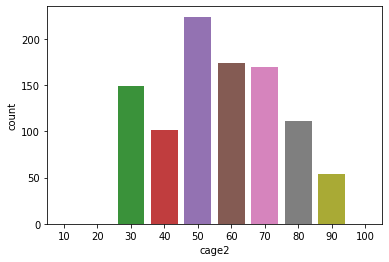

In [50]:
# Define the bins
bins = [0, 10, 20, 30,  40, 50, 60, 70, 80, 90,100]

# Create the labels for the bins
labels = ['10','20', '30','40', '50','60','70', '80','90', '100']

# Cut the continuous variable column into bins and assign labels
nc['cage2'] = pd.cut(nc['age'], bins=bins, labels=labels)

# Plot the count plot
sns.countplot(x='cage2', data=nc)

<AxesSubplot:xlabel='cage2', ylabel='count'>

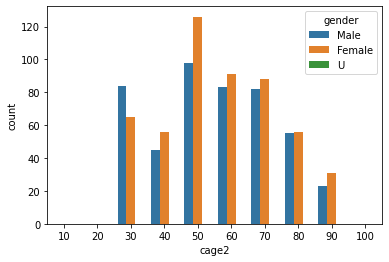

In [52]:
# Plot the count plot
sns.countplot(x='cage2', data=nc,hue='gender')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Property'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Telecommunications'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Argiculture')])

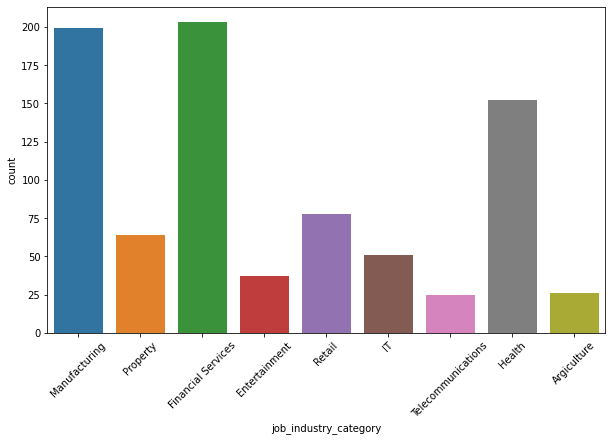

In [58]:
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='job_industry_category', data=nc)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Property'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Telecommunications'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Argiculture')])

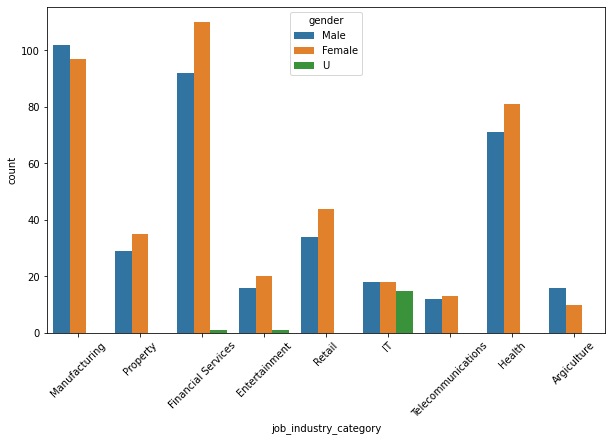

In [59]:
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='job_industry_category', data=nc,hue='gender')
plt.xticks(rotation=45)

In [61]:
c = pd.merge(cd, ca, on='customer_id')
c.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6.0,Curr,Duckhouse,Male,35.0,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [ ]:
sns.countplot(x='owns_car', data=c,hue='state')

<AxesSubplot:xlabel='state', ylabel='count'>

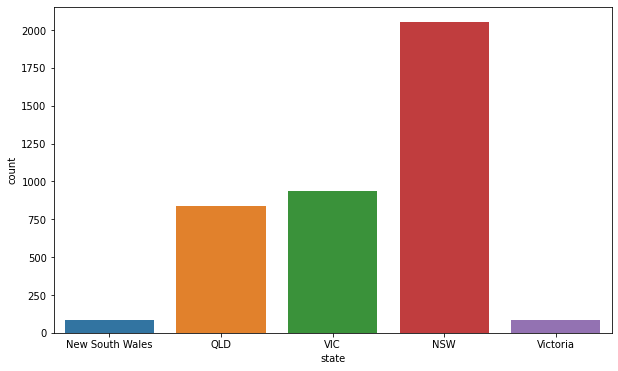

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=c)